# Importing Necessary libraries

In [213]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from urllib.parse import urlparse
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Data Gathering

Data Understanding:

Examine the dataset description provided to understand the dataset's characteristics, including its size, label distribution, and features.
Review the "Label" and "WebURL" columns to understand the format of the data and the task at hand.

In [130]:
df = pd.read_csv("data/train.csv", low_memory=False, index_col=False)

In [131]:
df.head(5)

,phising_status,phising_urls,additional_urls
0,2,https://blog.sockpuppet.us/,NaN
1,2,https://blog.apiki.com/seguranca/,NaN
2,1,http://autoecole-lauriston.com/a/T0RVd056QXlNe...,NaN
3,1,http://chinpay.site/index.html?hgcFSE@E$Z*DFcG...,NaN
4,2,http://www.firstfivenebraska.org/blog/article/...,NaN


# Data Preprocessing:

Performing preprocessing steps such as data cleaning, removing duplicates, and handling missing values.
Tokenize the URLs into individual components (e.g., domain, path, query parameters) for further analysis.
Convert the textual data into numerical representations suitable for machine learning models.

In [132]:
# checking for missing values in dataset

df.isna().sum()

phising_status          0
phising_urls            0
additional_urls    639987
dtype: int64

In [133]:
# dropping "additional_urls" columns

df = df.drop(columns=["additional_urls"])

* As we can see no missing data found in columns phising_status, phising_urls and additional_urls column has 639987 missing values, which will not be an useful column for the analysis, so dropped the column.

In [134]:
df.head(5)

,phising_status,phising_urls
0,2,https://blog.sockpuppet.us/
1,2,https://blog.apiki.com/seguranca/
2,1,http://autoecole-lauriston.com/a/T0RVd056QXlNe...
3,1,http://chinpay.site/index.html?hgcFSE@E$Z*DFcG...
4,2,http://www.firstfivenebraska.org/blog/article/...


In [208]:
df['phising_status'].value_counts()

phising_status
2    319998
1    319995
Name: count, dtype: int64

In [135]:
df.size

1279986

In [136]:
# checking duplicate rows from the dataset to ensure data integrity
df.duplicated().sum()

0

No dulpicate data in the dataset

In [137]:
df

,phising_status,phising_urls
0,2,https://blog.sockpuppet.us/
1,2,https://blog.apiki.com/seguranca/
2,1,http://autoecole-lauriston.com/a/T0RVd056QXlNe...
3,1,http://chinpay.site/index.html?hgcFSE@E$Z*DFcG...
4,2,http://www.firstfivenebraska.org/blog/article/...
...,...,...
639988,1,https://palmettopublicsafetysolutions.com/wp-1...
639989,2,https://txt-holdings.com/csr/
639990,1,http://www.getbeyou.com/wp-admin/js/widgets/8n...
639991,2,https://www.doellerer.at/feine-kost/heringssch...


In [138]:
# removing leading/trailing whitespaces from the 'phising_urls' column

df1 = df.copy()

df1["phising_urls"] = df1['phising_urls'].str.strip()

In [139]:
df1.head(4)

,phising_status,phising_urls
0,2,https://blog.sockpuppet.us/
1,2,https://blog.apiki.com/seguranca/
2,1,http://autoecole-lauriston.com/a/T0RVd056QXlNe...
3,1,http://chinpay.site/index.html?hgcFSE@E$Z*DFcG...


In [140]:
# converting all textual data to lowercase to ensure consistency as mot of the urls contains upper letters

df2 = df1.copy()

df2["phising_urls"] = df2['phising_urls'].str.lower()

In [141]:
df2.head(3)


,phising_status,phising_urls
0,2,https://blog.sockpuppet.us/
1,2,https://blog.apiki.com/seguranca/
2,1,http://autoecole-lauriston.com/a/t0rvd056qxlne...


In [159]:
df2["phising_urls"][8]

'http://j-hunterhunter.com/category/uncategorized/'

In [215]:
# tokenizing  URLs to split the URLs into individual components such as protocol, domain, path, query and fragment parameters.

df3 = df2.copy()

def tokenize_url(url):
    parsed_url = urlparse(url)
    return parsed_url


# tokenize urls
df3['parsed_url'] = df3['phising_urls'].apply(tokenize_url)

#extracting components from parsed_url
df3['protocol'] = df3['parsed_url'].apply(lambda x: x.scheme)
df3['domain'] = df3['parsed_url'].apply(lambda x: x.netloc)
df3['path'] = df3['parsed_url'].apply(lambda x: x.path)
df3['query_params'] = df3['parsed_url'].apply(lambda x: x.query)
df3['fragement'] = df3['parsed_url'].apply(lambda x: x.fragment)

In [216]:
df3.head(5)

,phising_status,phising_urls,parsed_url,protocol,domain,path,query_params,fragement
0,2,https://blog.sockpuppet.us/,"(https, blog.sockpuppet.us, /, , , )",https,blog.sockpuppet.us,/,,
1,2,https://blog.apiki.com/seguranca/,"(https, blog.apiki.com, /seguranca/, , , )",https,blog.apiki.com,/seguranca/,,
2,1,http://autoecole-lauriston.com/a/t0rvd056qxlne...,"(http, autoecole-lauriston.com, /a/t0rvd056qxl...",http,autoecole-lauriston.com,/a/t0rvd056qxlnelf6t1rnpq==/,,
3,1,http://chinpay.site/index.html?hgcfse@e$z*dfcg...,"(http, chinpay.site, /index.html, , hgcfse@e$z...",http,chinpay.site,/index.html,hgcfse@e$z*dfcgvhbinnikmojibhvgtfdrectfgvbh,
4,2,http://www.firstfivenebraska.org/blog/article/...,"(http, www.firstfivenebraska.org, /blog/articl...",http,www.firstfivenebraska.org,/blog/article/covid-19-daily-digest,,.xnvphyhkjiu


* After separating the protocol(scheme), domain(netloc), path, query_params(query), fragement form parsed_url, we can see most of the values in query_params and fragement is empty so need to fill these values.

In [205]:
# replacing empty value with None

df3['query_params'] = df3['query_params'].replace('', "<UNK>")
df3['fragement'] = df3['fragement'].replace('', "<UNK>")

In [206]:
df3

,phising_status,phising_urls,parsed_url,protocol,domain,path,query_params,fragement
0,2,https://blog.sockpuppet.us/,"(https, blog.sockpuppet.us, /, , , )",https,blog.sockpuppet.us,/,None,None
1,2,https://blog.apiki.com/seguranca/,"(https, blog.apiki.com, /seguranca/, , , )",https,blog.apiki.com,/seguranca/,None,None
2,1,http://autoecole-lauriston.com/a/t0rvd056qxlne...,"(http, autoecole-lauriston.com, /a/t0rvd056qxl...",http,autoecole-lauriston.com,/a/t0rvd056qxlnelf6t1rnpq==/,None,None
3,1,http://chinpay.site/index.html?hgcfse@e$z*dfcg...,"(http, chinpay.site, /index.html, , hgcfse@e$z...",http,chinpay.site,/index.html,hgcfse@e$z*dfcgvhbinnikmojibhvgtfdrectfgvbh,None
4,2,http://www.firstfivenebraska.org/blog/article/...,"(http, www.firstfivenebraska.org, /blog/articl...",http,www.firstfivenebraska.org,/blog/article/covid-19-daily-digest,None,.xnvphyhkjiu
...,...,...,...,...,...,...,...,...
639988,1,https://palmettopublicsafetysolutions.com/wp-1...,"(https, palmettopublicsafetysolutions.com, /wp...",https,palmettopublicsafetysolutions.com,/wp-1home/home.php,public/enroll/identifyuser-aspx-lob=rbglogon=m...,None
639989,2,https://txt-holdings.com/csr/,"(https, txt-holdings.com, /csr/, , , )",https,txt-holdings.com,/csr/,None,None
639990,1,http://www.getbeyou.com/wp-admin/js/widgets/8n...,"(http, www.getbeyou.com, /wp-admin/js/widgets/...",http,www.getbeyou.com,/wp-admin/js/widgets/8nsq9ma65w54ze/profile/ac...,id=c7668510137d25018da33289cb213a17country=gr/...,None
639991,2,https://www.doellerer.at/feine-kost/heringssch...,"(https, www.doellerer.at, /feine-kost/heringss...",https,www.doellerer.at,/feine-kost/heringsschmaus,None,None


In [219]:
# summary statistics for numerical features

numerical_summary = df['phising_status'].describe()
print("Summary Statistics for Numerical Features 'phising_status' :\n", numerical_summary)

Summary Statistics for Numerical Features 'phising_status' :
 count    639993.000000
mean          1.500002
std           0.500000
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: phising_status, dtype: float64


In [ ]:
# count of unique values

In [209]:
# distribution of phising and legitimate URLs


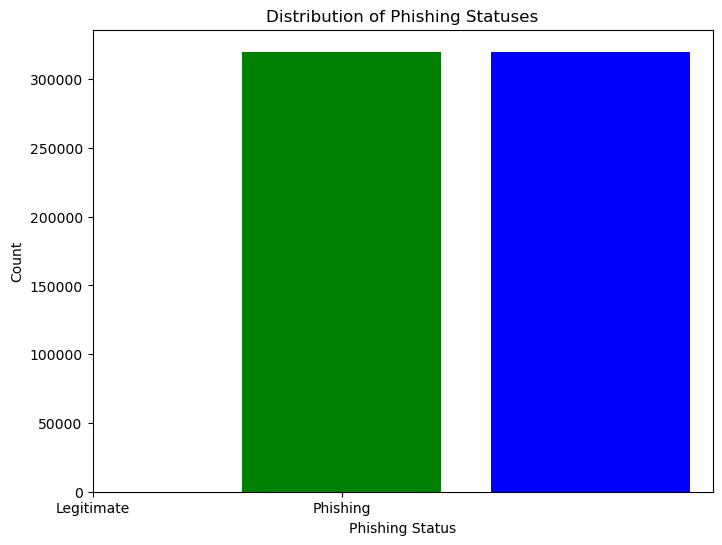

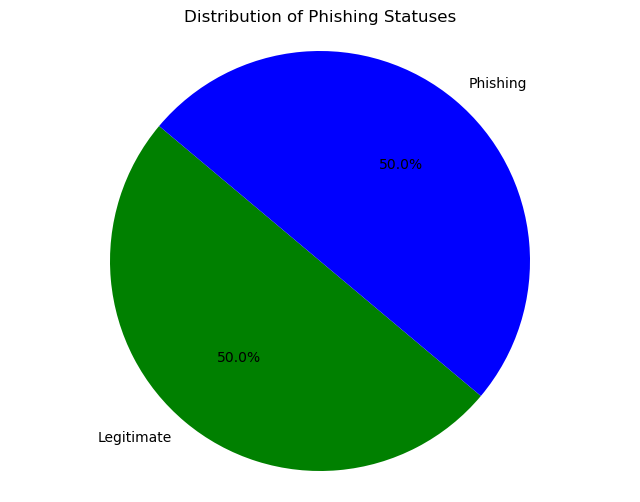

In [212]:
df3['protocol'].value_counts()

protocol
https        339145
http         300590
                161
mailto           36
ftp              19
feed             11
itpc              6
rsync             6
webcal            4
ts3server         2
hxxps             2
rtsp              1
htttp             1
ldap              1
safaris           1
ttp               1
thtp              1
file              1
appstream         1
pcast             1
ts3               1
irc               1
Name: count, dtype: int64